# Central Limit Theorem
## Author: Snigdhayan Mahanta
The Central Limit Theorem states that if there is a population with mean = $\mu$ and standard deviation = $\sigma$ and one draws sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normal. Moreover, $\mu$ and $\sigma$ can be estimated in a manner explained below.

In [1]:
#Create random population data of reasonable size
pop_size <-100000
min_value <- 50
max_value <- 100
set.seed(123)
population1 <- runif(2*pop_size, min = min_value, max = max_value) #uniformly distributed between min_value and max_value 
population2 <- runif(pop_size, min = -max_value, max = -min_value) #uniformly distributed between -max_value and -min_value 
population <- c(population1, population2) #combined population
#population <- rbinom(pop_size, 1, 0.3) # a different population

In [2]:
#Compute actual mean and standard deviation of the population
mu <- mean(population)
sigma <- sd(population)

In [3]:
#Define sampling mechanism - no. of sampling trials and sample size for each trial
trials = 1000
sample_size = 50

In [4]:
#Generate sample statistics - draw a random sample and compute its mean; repeat the procedure for the selected no. of trials
mySample <- numeric(trials)
for (i in c(1:trials)) {
  sample <- sample(population, size = sample_size, replace = TRUE)
  mySample[i] <- mean(sample)
}

In [5]:
#Compute estimates for mean and standard deviation from the data generated by the trials
mu_estimate <- mean(mySample) # mean of sample means is a good estimate for population mean
sigma_sample <- sd(mySample)
sigma_estimate <- sigma_sample*sqrt(sample_size) # standard deviation of sample means is biased and needs to be adjusted

In [6]:
#Compare the estimated parameters with the actual ones
result <- data.frame("Actual_mean" = mu,
                     "Estimated_mean" = mu_estimate,
                     "Actual_sd" = sigma,
                     "Estimated_sd" = sigma_estimate)

In [7]:
#Compare the actual and the estimated values of mean and standard deviation
print(result)

  Actual_mean Estimated_mean Actual_sd Estimated_sd
1     24.9961       25.11648  72.15164     73.03418


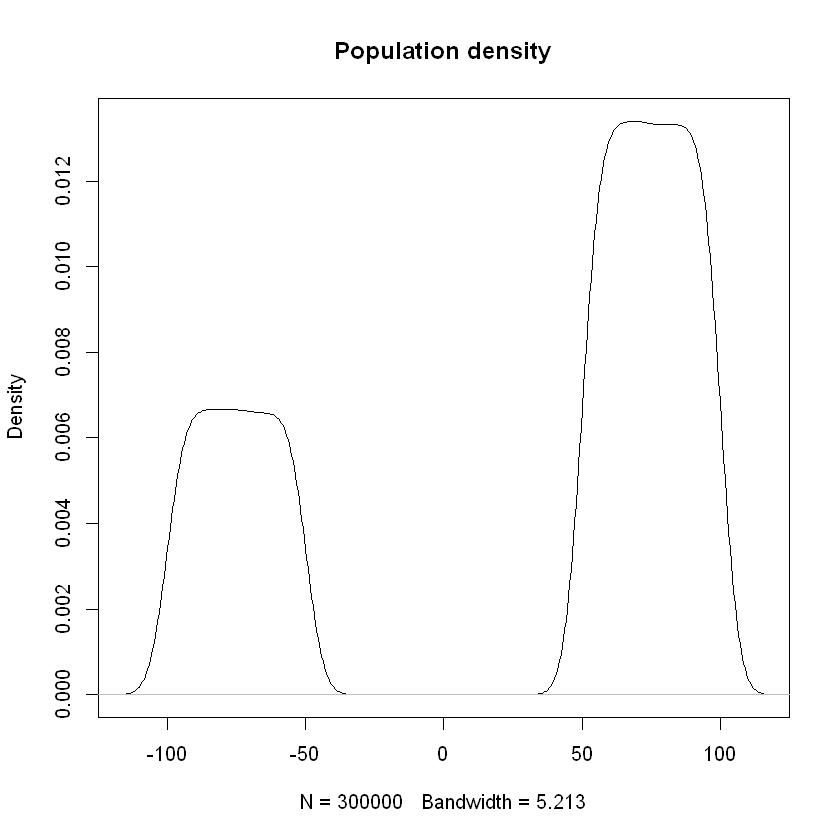

In [8]:
#Plot population density
plot(density(population), main = "Population density") #should reflect the chosen population distribution above

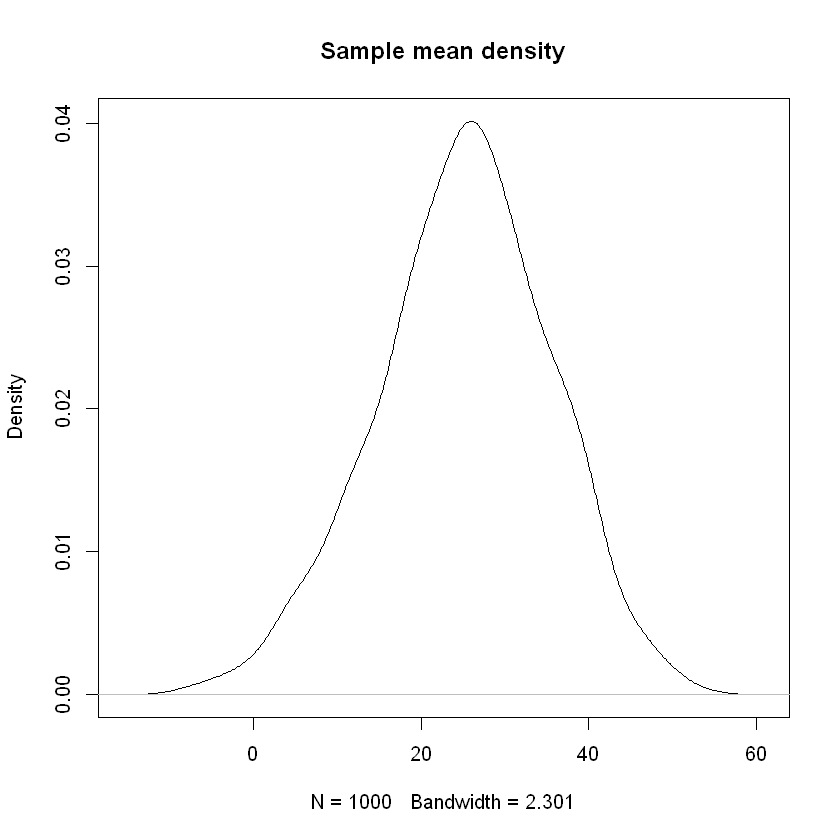

In [9]:
#Plot sample density
plot(density(mySample), main = "Sample mean density") #should look like a normal distribution